**Importando bibliotecas**

In [405]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

**Função para verificar a porcentagem de cada Cidade**

In [406]:
def plot_porcentagens_cidades(df_cidade):
    total_casos = df_cidade['Total'].sum()
    
    porcentagens = (df_cidade['Total'] / total_casos) * 100
    
    plt.figure(figsize=(10, 10))
    
    explode = [0.2] * len(df_cidade)
    
    plt.pie(porcentagens, labels=df_cidade['Região de Saúde'], autopct='%1.1f%%', startangle=140, explode=explode)
    plt.title('Porcentagem de casos de Dengue por cidade entre 2019 a 2023')
    plt.axis('equal') 
    plt.show()


**Função para verificar a cidade com mais casos**

In [407]:
def cidade_com_mais_casos(df_cidade):
    if 'Total' in df_cidade.columns:
        df_cidade.drop(columns=['Total'], inplace=True)

    df_cidade['Total'] = df_cidade.iloc[:, 1:].sum(axis=1)

    cidade_mais_casos = df_cidade.loc[df_cidade['Total'].idxmax()]

    quantidade_casos = cidade_mais_casos['Total']
    total_casos = df_cidade['Total'].sum()
    porcentagem_casos = (quantidade_casos / total_casos) * 100

    print("Região de Saúde com mais casos de dengue:")
    print(cidade_mais_casos['Região de Saúde'])
    print("Quantidade total de casos de dengue nesta região:")
    print(quantidade_casos)
    print("Porcentagem de casos em relação ao total:")
    print("{:.2f}%".format(porcentagem_casos))


**Função para verificar a região com mais casos**

In [408]:
def regiao_com_mais_casos(df_regiao):
    if 'Total' in df_regiao.columns:
        df_regiao.drop(columns=['Total'], inplace=True)

    df_regiao['Total'] = df_regiao.iloc[:, 1:].sum(axis=1)

    regiao_mais_casos = df_regiao.loc[df_regiao['Total'].idxmax()]

    quantidade_casos = regiao_mais_casos['Total']

    print("Região de Saúde com mais casos de dengue:")
    print(regiao_mais_casos['Região de Saúde'])
    print("Quantidade total de casos de dengue nesta região:")
    print(quantidade_casos)

**Função para plotar cada uma das regiões administrativas**

In [409]:
def plotar_casos_dengue_por_regiao(dados):
    anos = [2019, 2020, 2021, 2022, 2023]
    for regiao_saude in dados['Região de Saúde'].unique():
        dados_regiao = dados[dados['Região de Saúde'] == regiao_saude]
        
        casos_por_ano = [dados_regiao[ano].sum() for ano in anos]
        
        plt.figure(figsize=(10, 6))
        plt.plot(anos, casos_por_ano, marker='o')
        plt.title(f"Casos de Dengue por Ano na Região de Saúde: {regiao_saude}")
        plt.xlabel("Ano")
        plt.ylabel("Casos de Dengue")
        plt.xticks(anos)
        plt.grid(True)
        plt.show()

   **Criando um função de  mapa de calor com os casos de Dengue em subdistritos,
    utilizando dados de um arquivo Excel e um arquivo GeoJSON.**

In [410]:
def criar_mapa_dengue(nome_arquivo_geojson, nome_arquivo_excel):
    # Carregar dados de casos de Dengue
    casos = pd.read_excel(nome_arquivo_excel)
    casos = casos.dropna(subset=["subdistrito"])
    casos["casos"] = casos[[2019, 2020, 2021, 2022, 2023]].sum(axis=1)
    
    # Criar o mapa
    mapa = folium.Map([-15.7801, -47.9292], zoom_start=9)
    
    # Adicionar o mapa de coropléticos
    folium.Choropleth(
        geo_data=nome_arquivo_geojson,
        data=casos,
        columns=["subdistrito", "casos"],
        key_on="feature.properties.id",
        fill_color="GnBu",
        fill_opacity=0.9,
        line_opacity=0.5,
        legend_name="DENGUE",
        nan_fill_color="white",
        name="Casos de Dengue"
    ).add_to(mapa)
    
    # Estilo para os elementos não destacados
    estilo = lambda x: {
        "fillColor": "white",
        "color": "black",
        "fillOpacity": 0.001,
        "weight": 0.001
    }

    # Estilo para os elementos destacados
    estilo_destaque = lambda x: {
        "fillColor": "darkblue",
        "color": "black",
        "fillOpacity": 0.5,
        "weight": 1
    }

    # Adicionando o GeoJson para Cidades
    highlight = folium.features.GeoJson(
        data=nome_arquivo_geojson,
        style_function=estilo,
        highlight_function=estilo_destaque,
        name="Cidades"
    )

    # Adicionando caixa de texto para Cidades
    folium.features.GeoJsonTooltip(
        fields=["name", "id"],
        aliases=["Subdistrito:", "Casos"],
        labels=True,
        style="background-color: white; color: black; font-family: arial; font-size: 16px; padding: 10px;"
    ).add_to(highlight)

    # Adicionando o destaque ao mapa
    mapa.add_child(highlight)

    # Adicionando o controle de camadas
    folium.LayerControl().add_to(mapa)

    # Retornar o mapa
    return mapa

**Segundo o site https://www.saude.df.gov.br/informes-dengue-chikungunya-zika-febre-amarela, esses são os dados de Dengue no DF (2019-2023)**

In [411]:
df = pd.read_excel('casos-dengue.xlsx')

In [412]:
df = df.iloc[:, :-1]

**Excel somente com as cidades do DF**

In [413]:
linhas_a_pagar = [0, 7, 16, 21, 26, 29, 35, 39]
linhas_cidades = df.drop(index=linhas_a_pagar)

In [414]:
linhas_cidades

,Região de Saúde,2019,2020,2021,2022,2023
1,. Cruzeiro,278,359,92,570,199
2,. Lago Norte,422,512,299,702,283
3,. Lago Sul,300,460,127,529,223
4,. Plano Piloto,1658,2008,607,1896,1047
5,. Sudoeste Octogonal,220,179,91,239,146
6,. Varjão,662,126,42,203,84
8,. Candangolândia,365,261,43,263,101
9,. Estrutural,563,237,188,671,353
10,. Guará,1828,2887,481,2296,745
11,. Núcleo Bandeirante,591,251,88,300,143


**Baixa um novo excel somente com as cidades**

In [415]:
linhas_cidades.to_excel('resultado_analise_cidade.xlsx', index=False)

**Excel somente com as Regiões do DF**

In [416]:
linhas_regiao = df.iloc[[0, 7, 16, 21, 26, 29, 35]]

In [417]:
linhas_regiao

,Região de Saúde,2019,2020,2021,2022,2023
0,CENTRAL,3540,3644,1258,4139,1982
7,CENTRO-SUL,4851,4935,1070,5143,2748
16,LESTE,8742,4403,2396,6548,3965
21,NORTE,10513,8139,6082,9857,4632
26,OESTE,5473,5897,1817,13179,7825
29,SUDOESTE,8076,11407,3142,17369,10095
35,SUL,1795,8549,467,1827,1603


**Baixa um novo excel somente com as cidades**

In [418]:
linhas_regiao.to_excel('resultado_analise_regiao.xlsx', index=False)

**Cidade com mais casos entre 2019 a 2023**

In [419]:
df_cidade = pd.DataFrame(linhas_cidades)
cidade_com_mais_casos(df_cidade)

Região de Saúde com mais casos de dengue:
. Ceilândia
Quantidade total de casos de dengue nesta região:
27831
Porcentagem de casos em relação ao total:
12.79%


**Região com mais casos entre 2019 a 2023**

In [420]:
df_regiao = pd.DataFrame(linhas_regiao)
regiao_com_mais_casos(df_regiao)

Região de Saúde com mais casos de dengue:
SUDOESTE
Quantidade total de casos de dengue nesta região:
50089


**Casos de dengue para cada regiões administrativas entre 2019 a 2023**

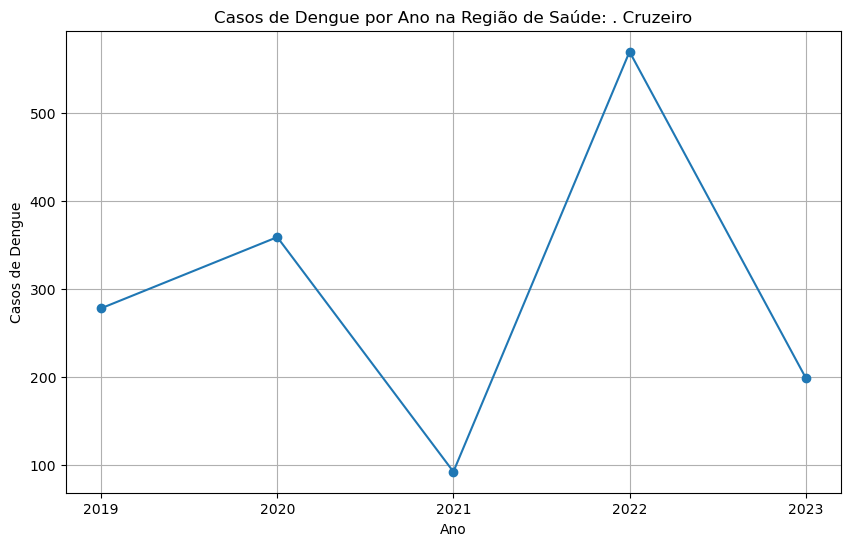

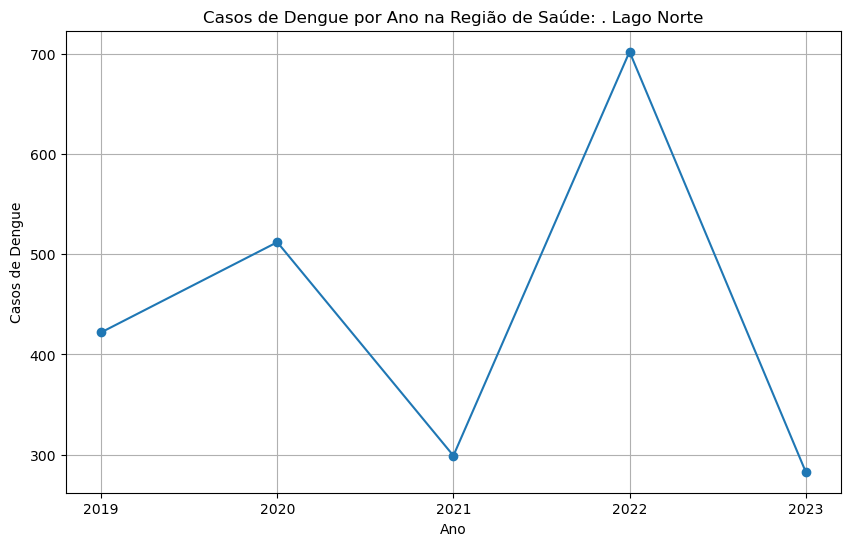

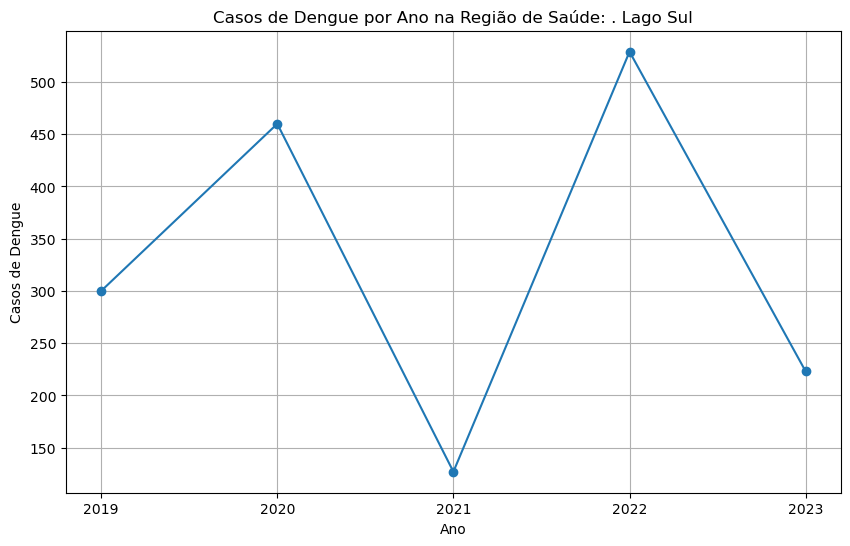

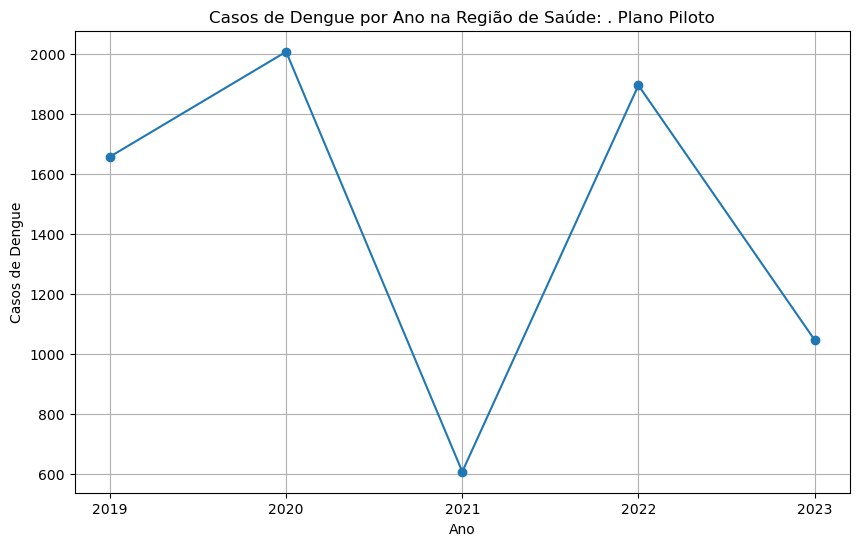

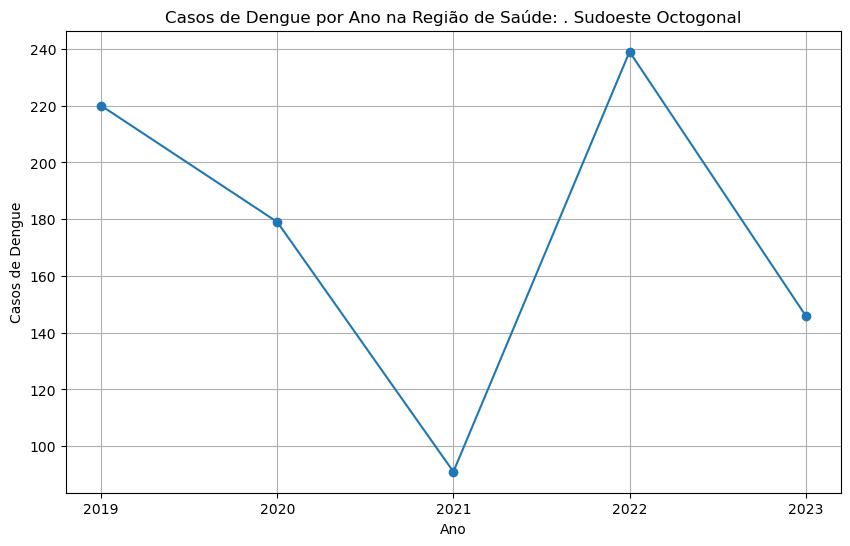

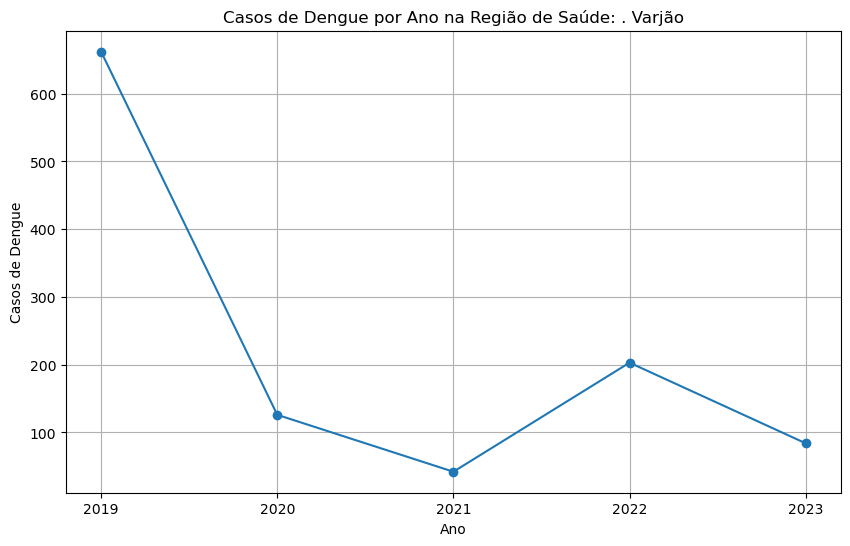

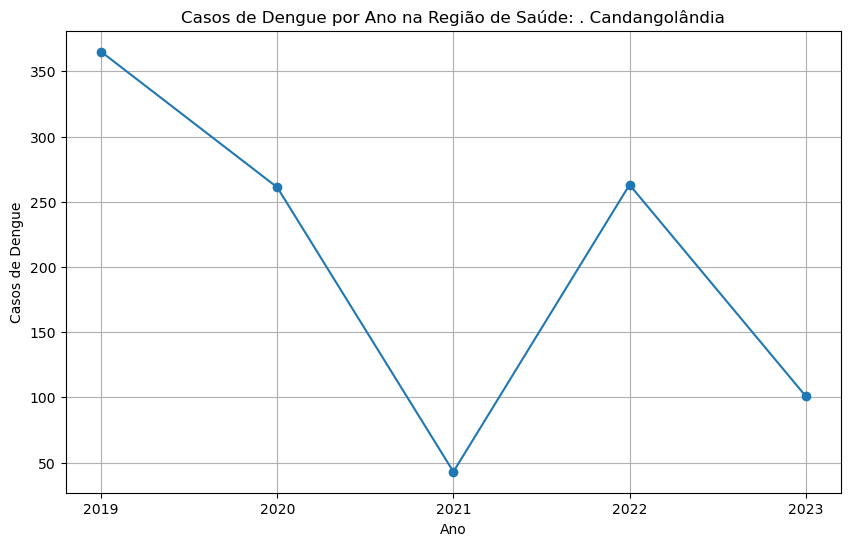

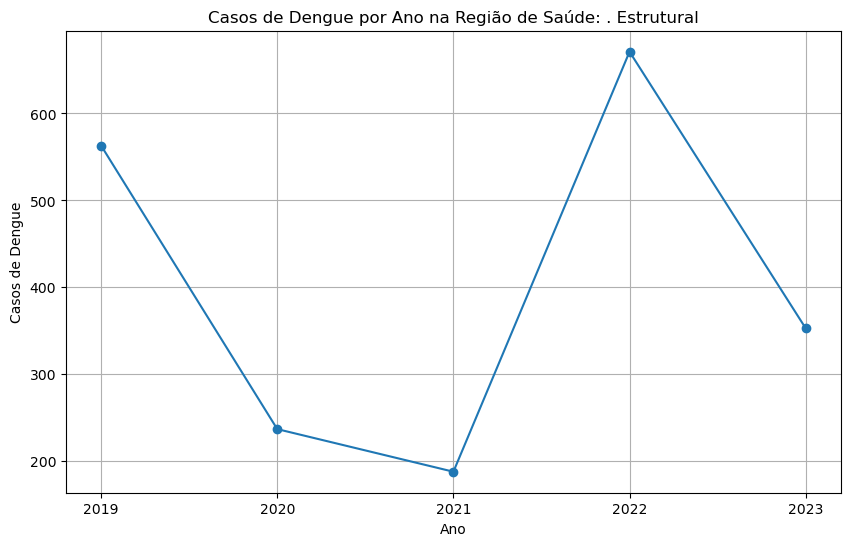

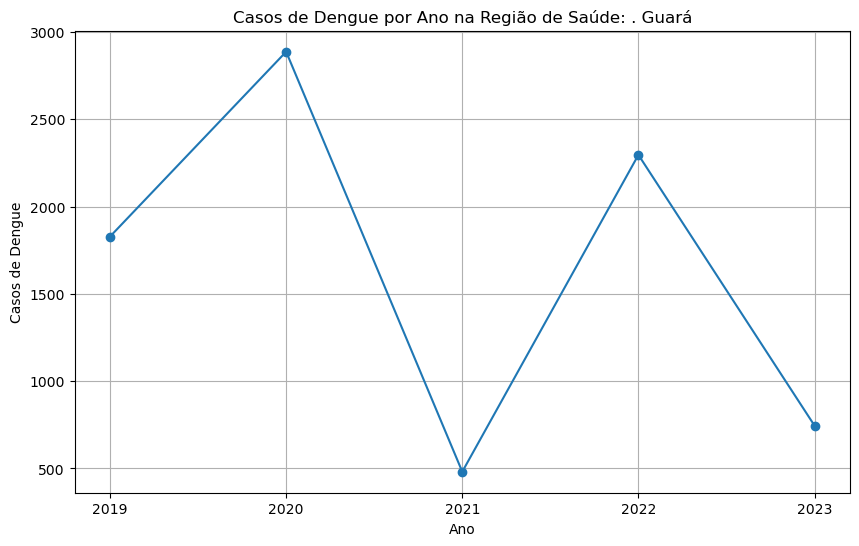

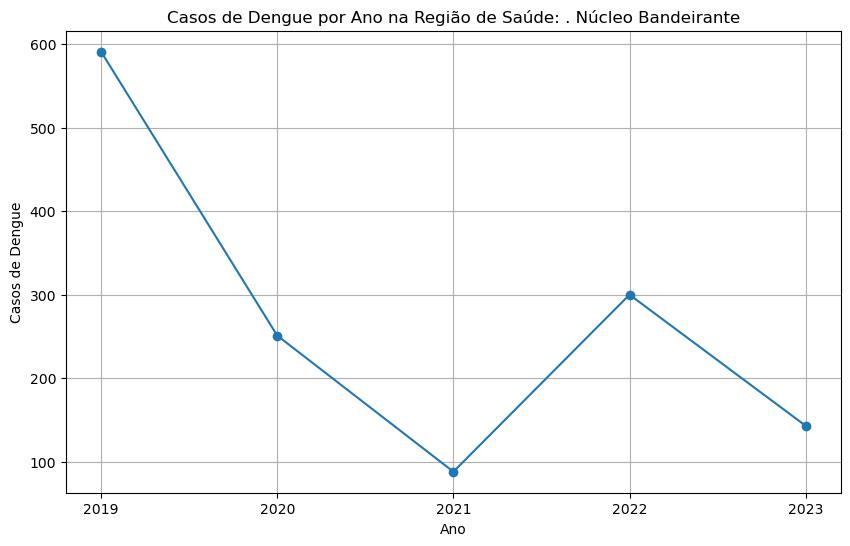

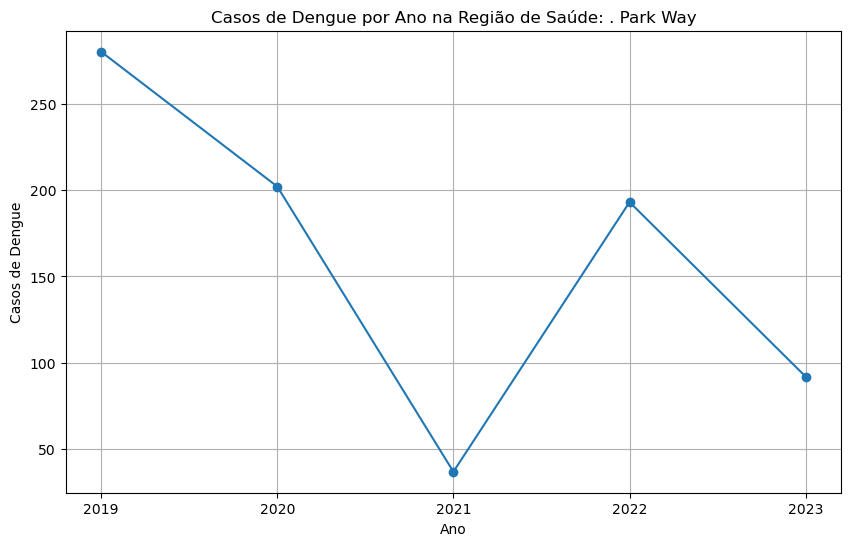

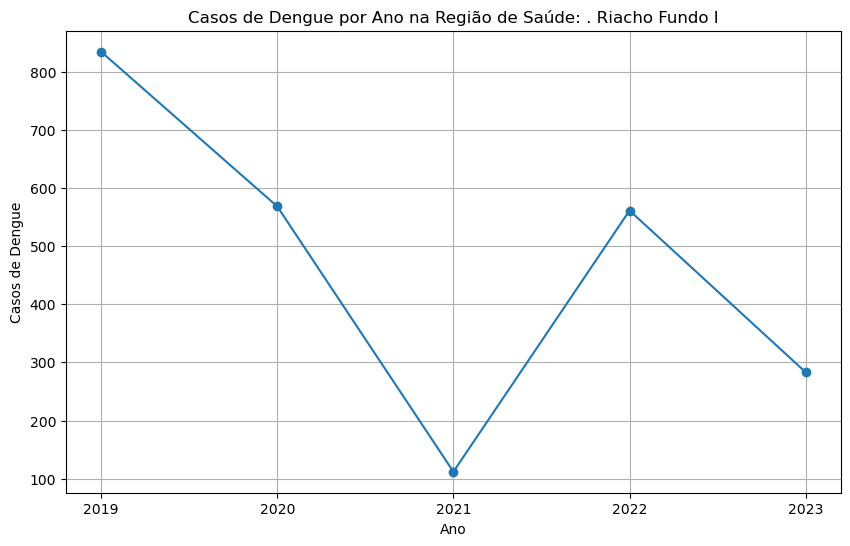

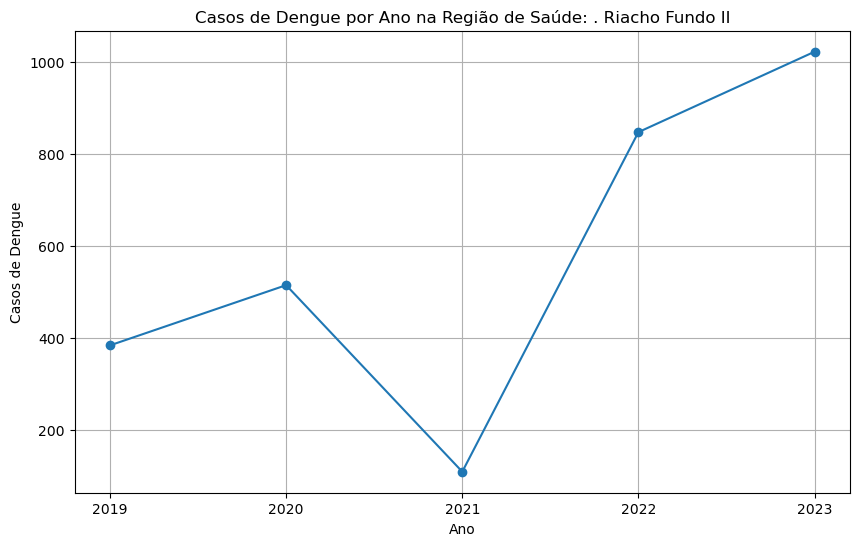

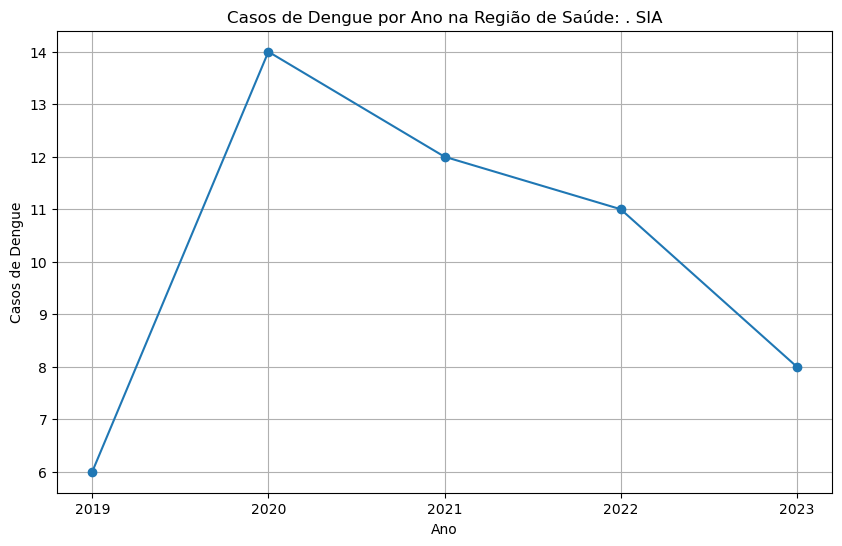

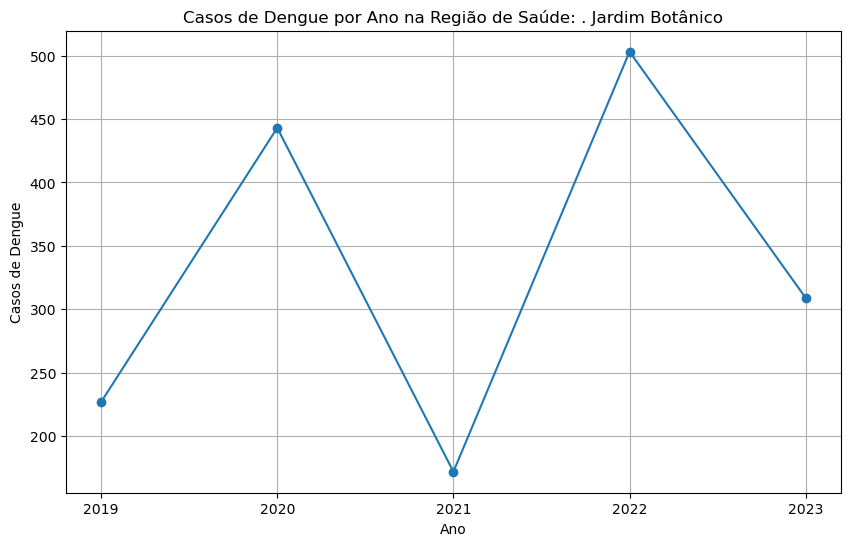

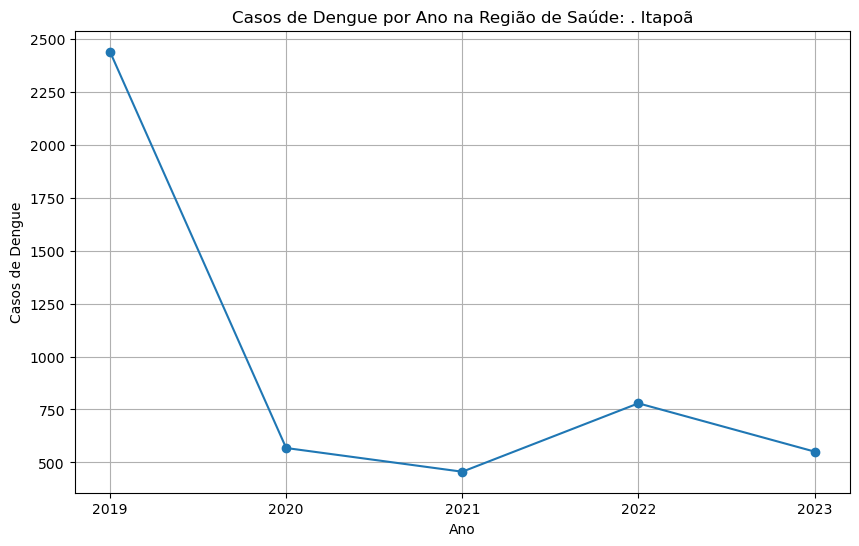

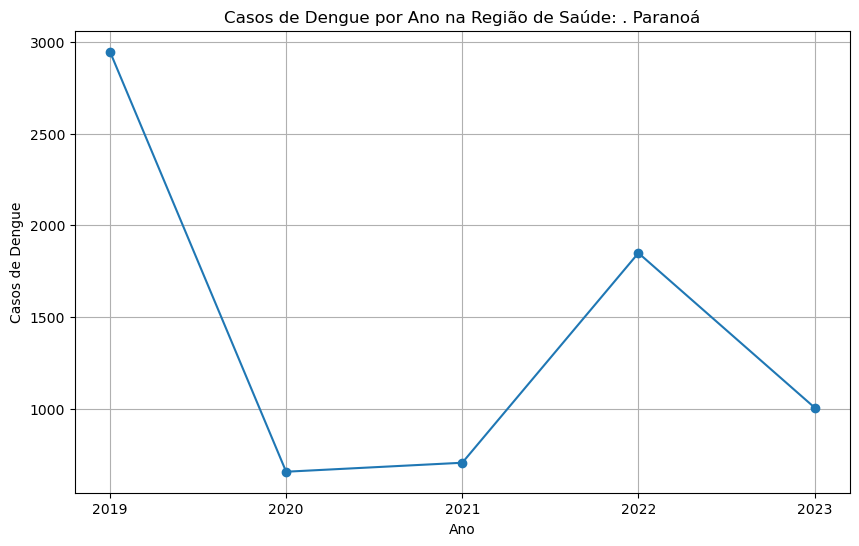

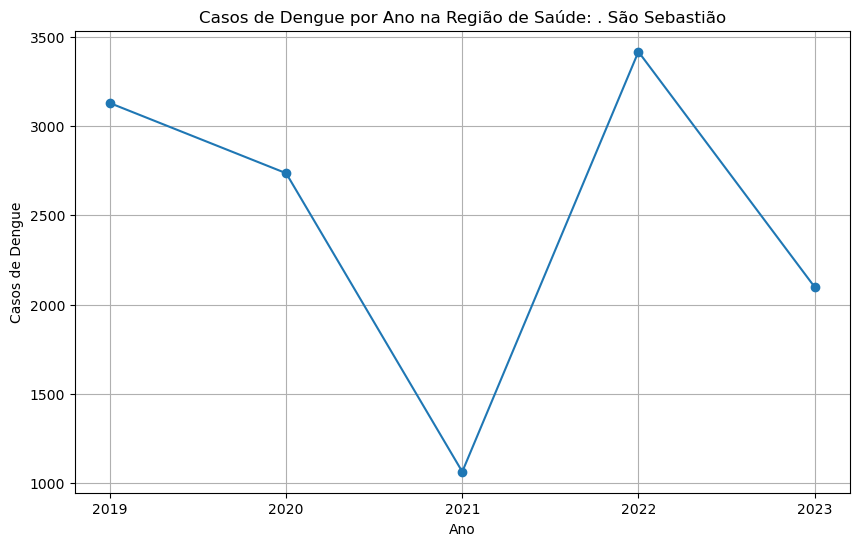

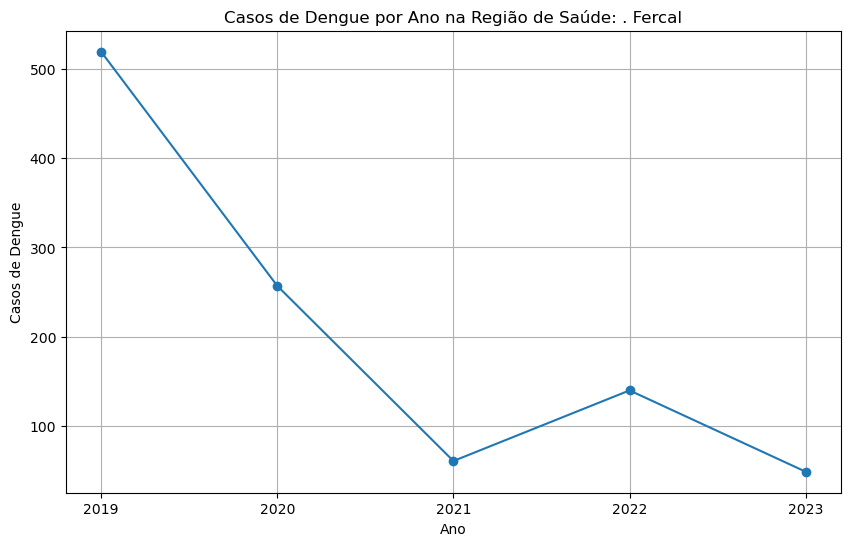

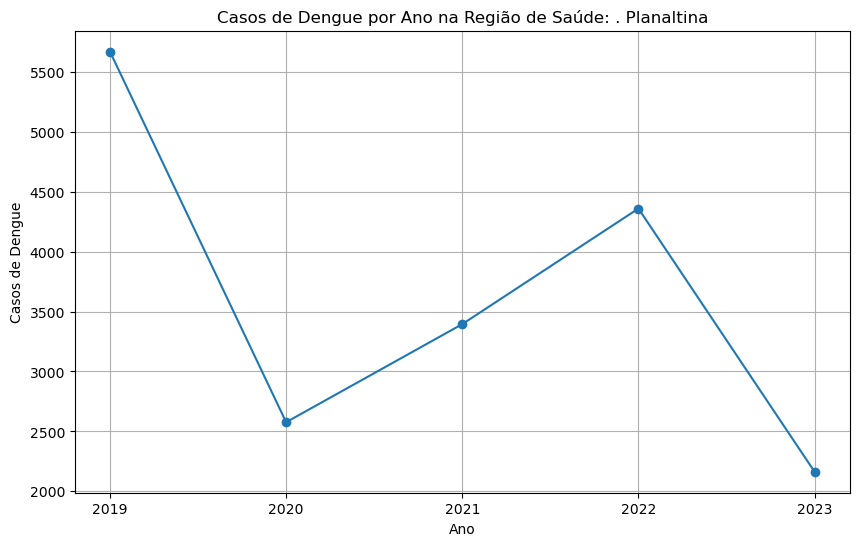

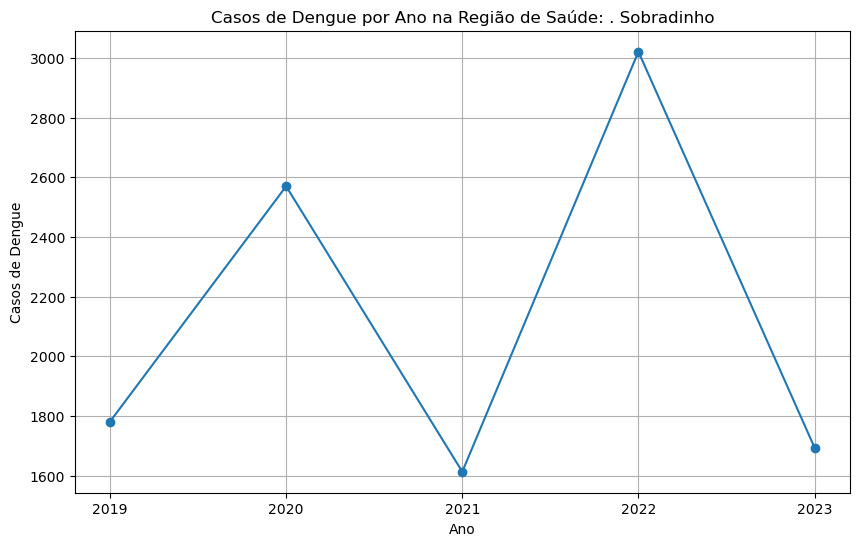

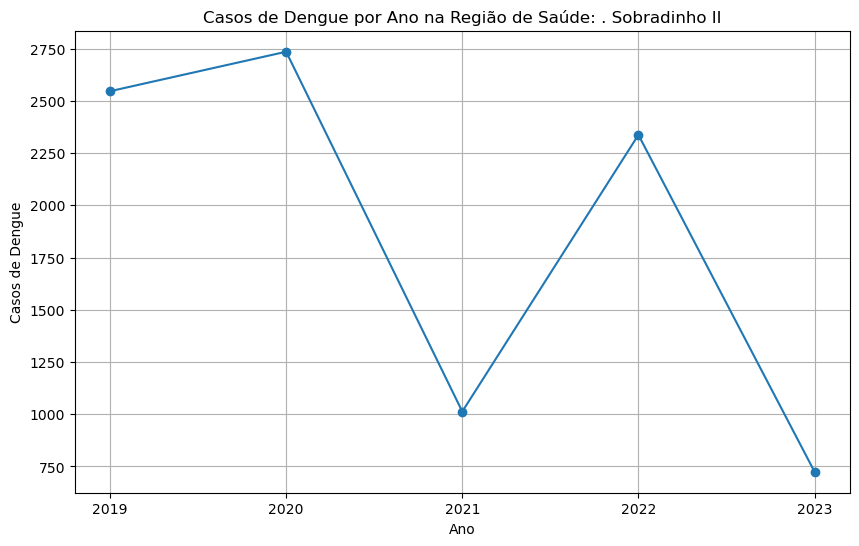

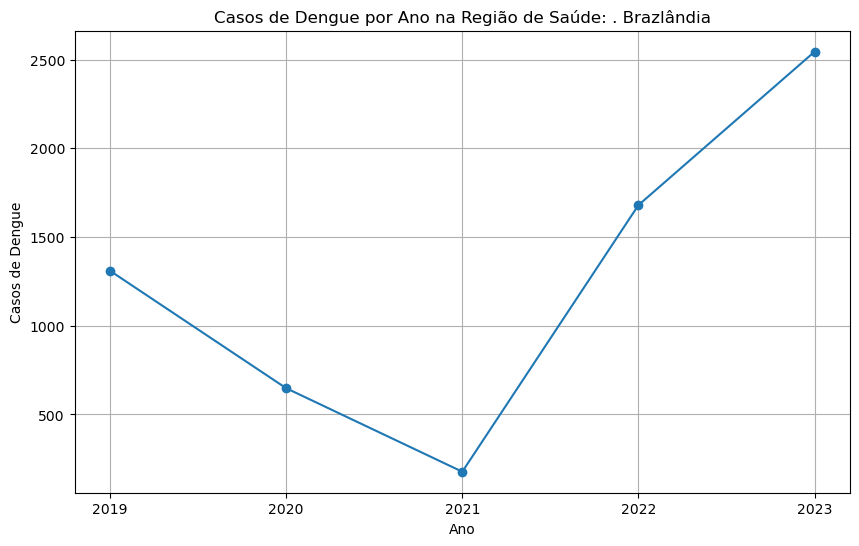

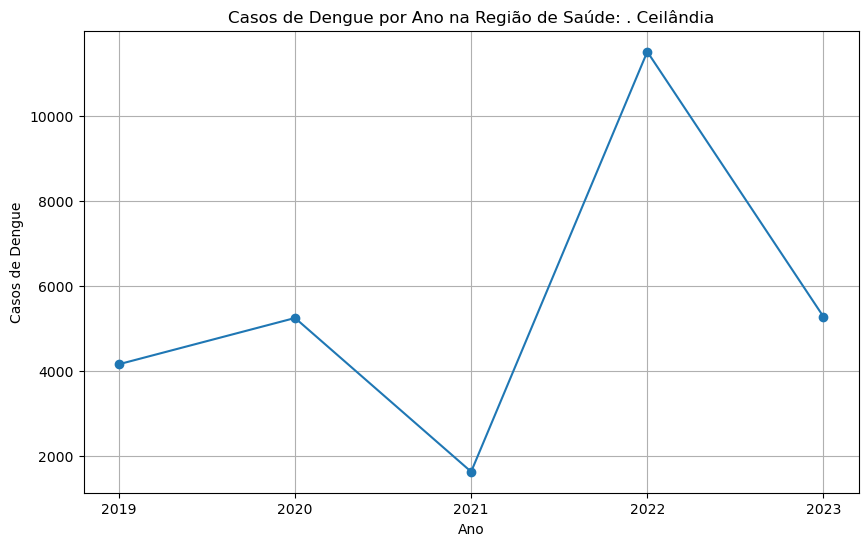

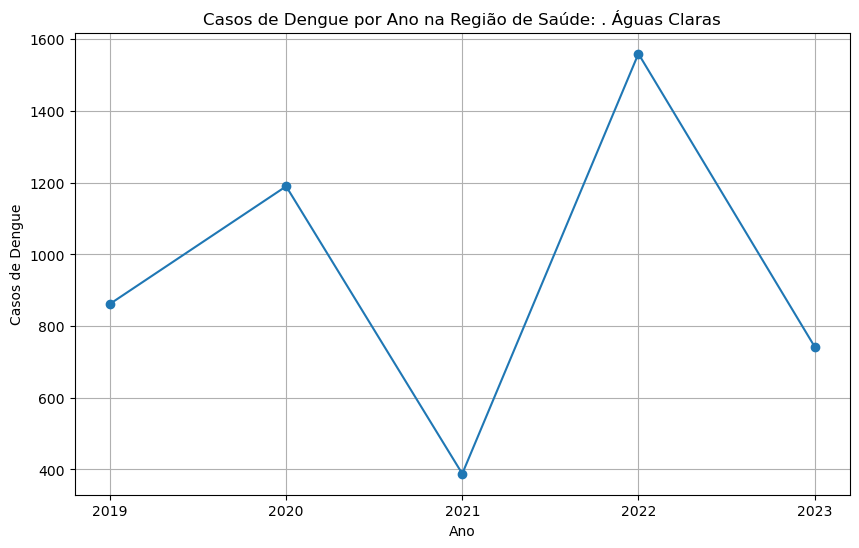

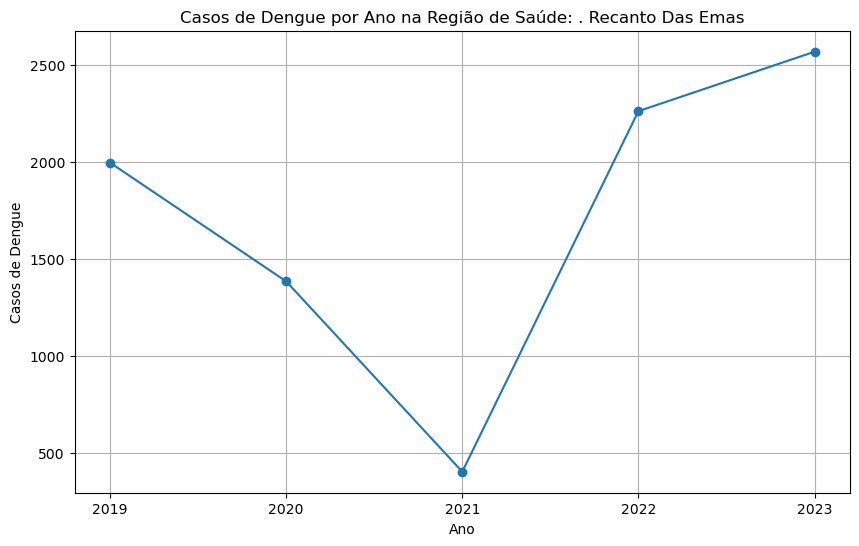

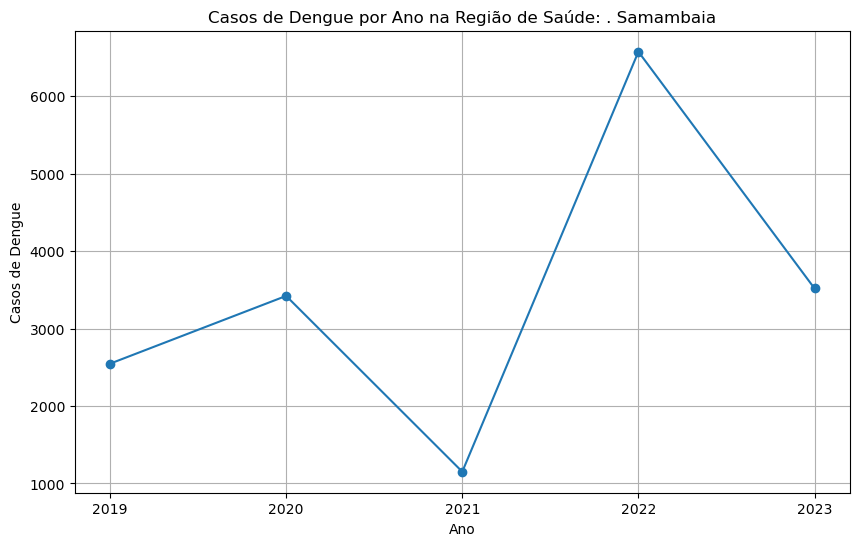

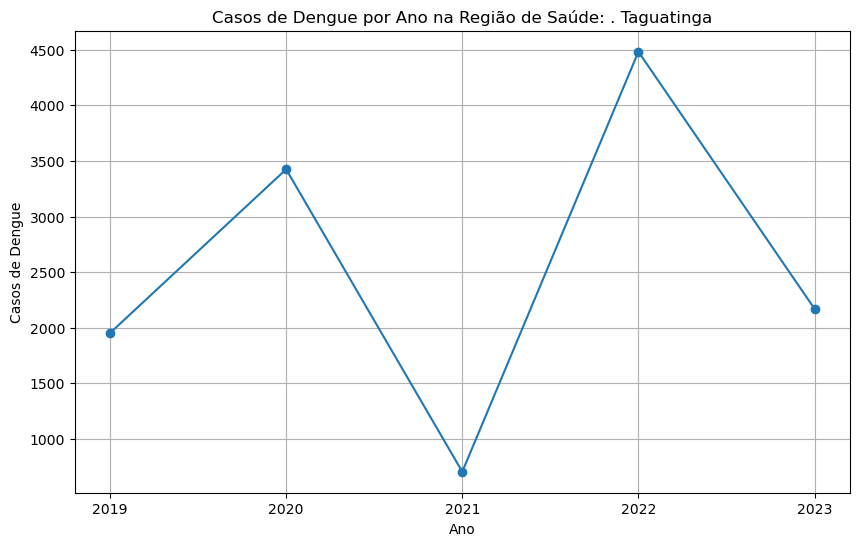

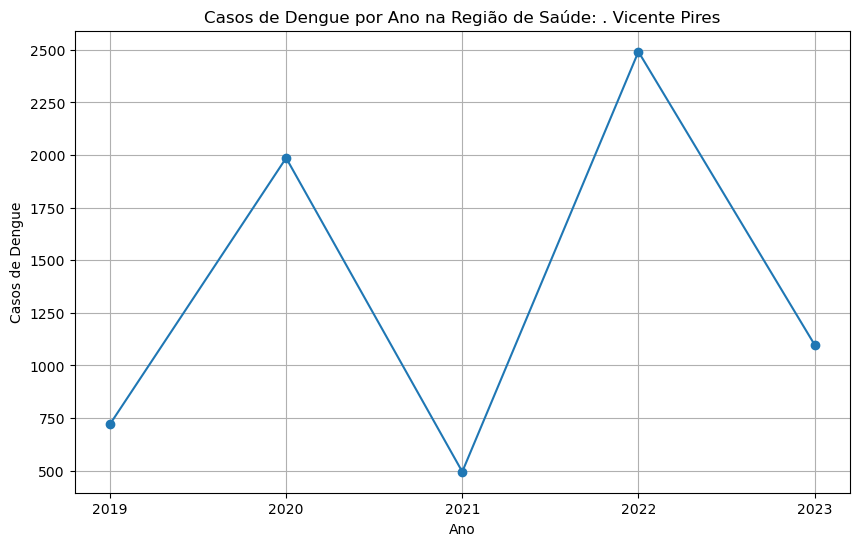

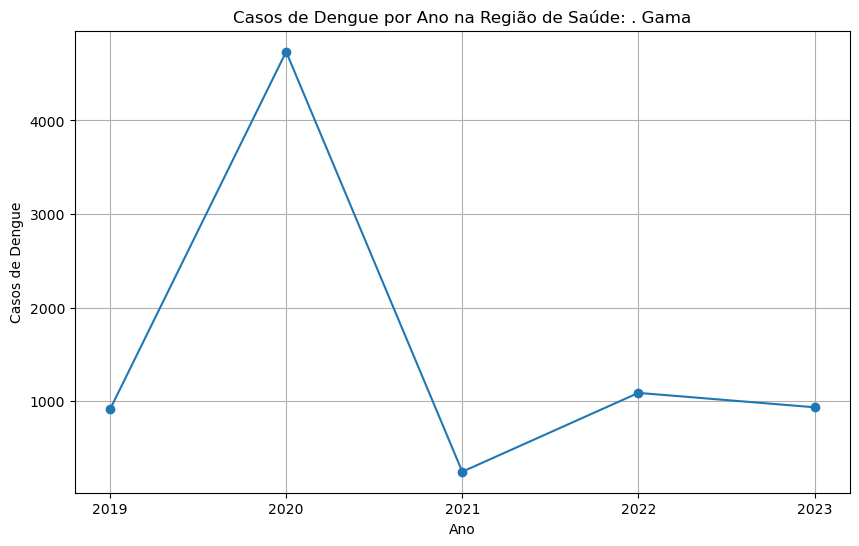

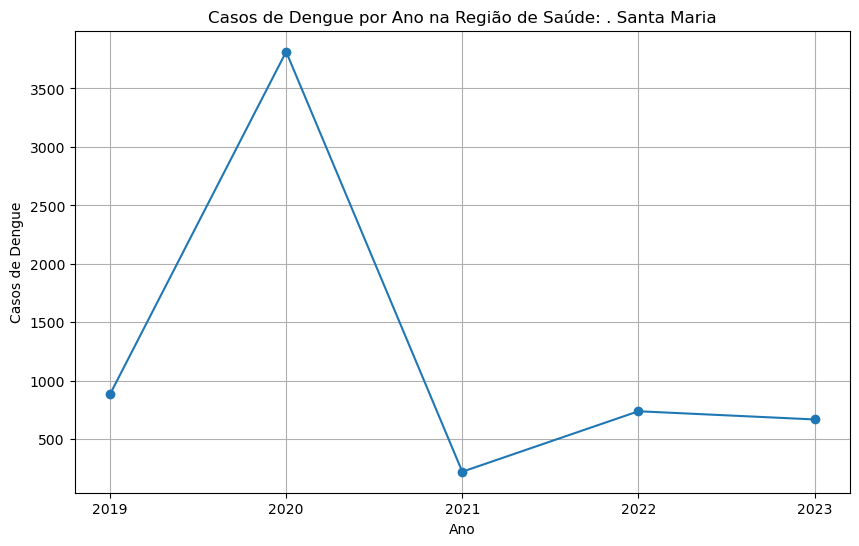

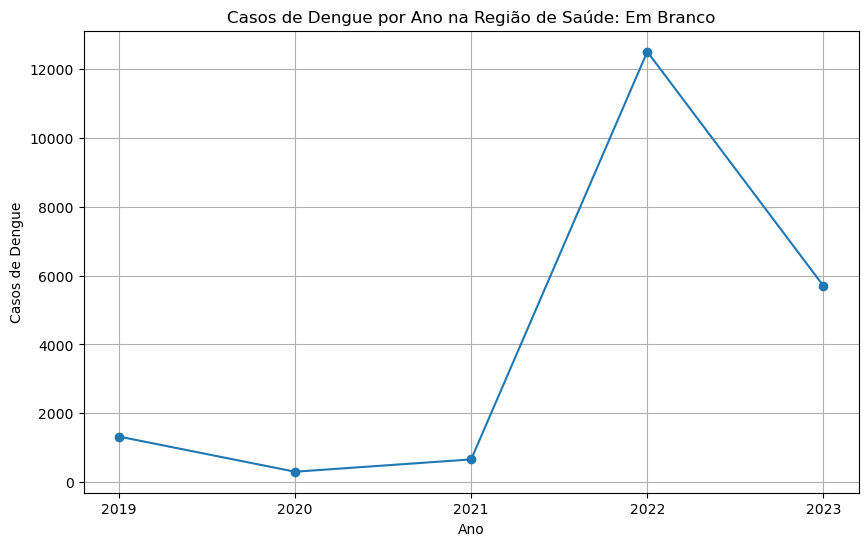

In [421]:
plotar_casos_dengue_por_regiao(linhas_cidades)

**Demostra a porcentagem de casos de cada cidade do DF**

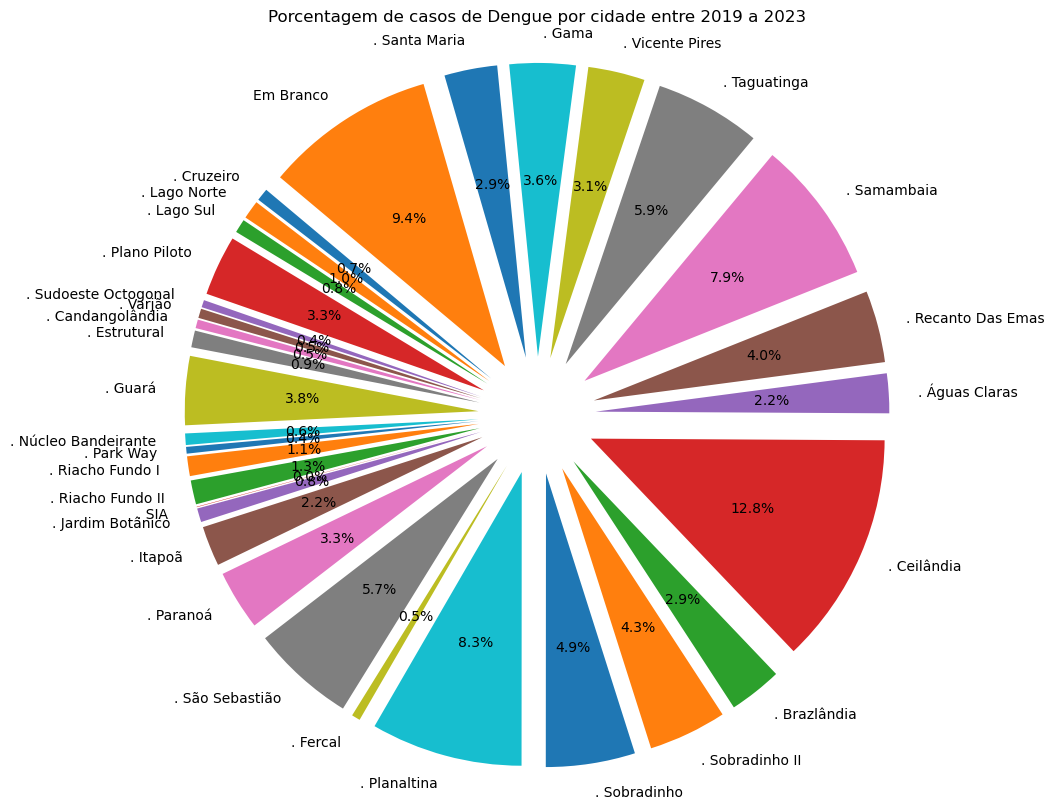

In [422]:
plot_porcentagens_cidades(df_cidade)

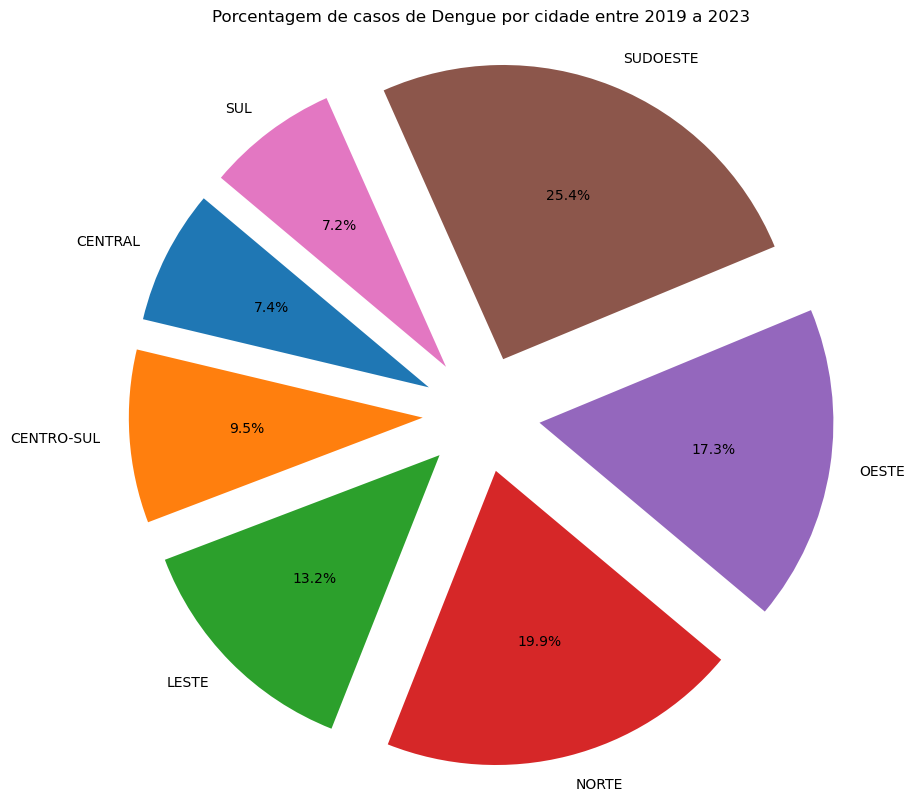

In [423]:
plot_porcentagens_cidades(df_regiao)

**Cria um mapa de calor que representa a incidência de casos de Dengue nos Subdistritos, utilizando dados de um arquivo Excel e geometrias de um arquivo GeoJSON.**

In [425]:

nome_arquivo_geojson = "mapa - Copia.json"
nome_arquivo_excel = "subdistritos.xlsx"
mapa_dengue = criar_mapa_dengue(nome_arquivo_geojson, nome_arquivo_excel)
mapa_dengue
